In [1]:
#Import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
#importing train and test dataset 
hp_train=pd.read_csv("hp_train.csv")
hp_test=pd.read_csv("hp_test.csv")

In [3]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
hp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
hp_train.shape

(1168, 81)

In [6]:
hp_test.shape

(292, 80)

In [7]:
hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
hp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
hp_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
hp_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [11]:
hp_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
hp_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [13]:
hp_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


In [14]:
hp_test.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
Id,1.000000,0.035247,-0.017848,-0.045497,0.005823,-0.089945,-0.000174,-0.036955,-0.012331,-0.040462,...,-0.033619,0.049117,-0.000275,-0.134738,-0.012348,NaN,NaN,-0.073024,0.015132,0.034579
MSSubClass,0.035247,1.000000,-0.487565,-0.186654,-0.116077,-0.068113,0.041932,-0.023317,0.002761,-0.142908,...,0.028190,-0.097449,-0.047570,-0.045672,-0.072139,NaN,NaN,0.137542,-0.004079,0.044441
LotFrontage,-0.017848,-0.487565,1.000000,0.383137,0.267153,-0.108327,0.152067,0.059014,0.151632,0.165505,...,0.007567,0.084421,-0.061468,0.111592,0.077651,NaN,NaN,0.032309,-0.048399,0.064554
LotArea,-0.045497,-0.186654,0.383137,1.000000,0.109161,-0.071113,0.037757,-0.022957,0.062943,0.209632,...,0.059117,0.067269,-0.055667,0.007832,0.090367,NaN,NaN,-0.020398,-0.034709,0.041735
OverallQual,0.005823,-0.116077,0.267153,0.109161,1.000000,-0.131891,0.560092,0.528983,0.424314,0.328421,...,0.288506,0.175569,-0.195240,-0.031605,0.086383,NaN,NaN,-0.099852,-0.008545,0.061736
OverallCond,-0.089945,-0.068113,-0.108327,-0.071113,-0.131891,1.000000,-0.366830,0.045747,-0.082467,-0.126968,...,-0.078167,-0.065010,0.137325,-0.038308,-0.003167,NaN,NaN,0.019495,-0.043722,-0.001908
YearBuilt,-0.000174,0.041932,0.152067,0.037757,0.560092,-0.366830,1.000000,0.593138,0.284734,0.343374,...,0.311878,0.179072,-0.457897,0.011253,-0.019113,NaN,NaN,-0.085967,-0.060201,-0.014054
YearRemodAdd,-0.036955,-0.023317,0.059014,-0.022957,0.528983,0.045747,0.593138,1.000000,0.169188,0.191460,...,0.243722,0.174213,-0.196420,-0.031424,-0.009695,NaN,NaN,-0.103391,0.009670,0.045230
MasVnrArea,-0.012331,0.002761,0.151632,0.062943,0.424314,-0.082467,0.284734,0.169188,1.000000,0.254935,...,0.196125,0.099761,-0.148557,0.020375,0.120597,NaN,NaN,-0.059927,-0.082810,0.012790
BsmtFinSF1,-0.040462,-0.142908,0.165505,0.209632,0.328421,-0.126968,0.343374,0.191460,0.254935,1.000000,...,0.254996,0.124929,-0.209330,0.030231,0.178546,NaN,NaN,-0.045842,-0.113279,0.052788


In [15]:
hp_test.drop(['PoolArea','PoolQC'],axis=1,inplace=True)

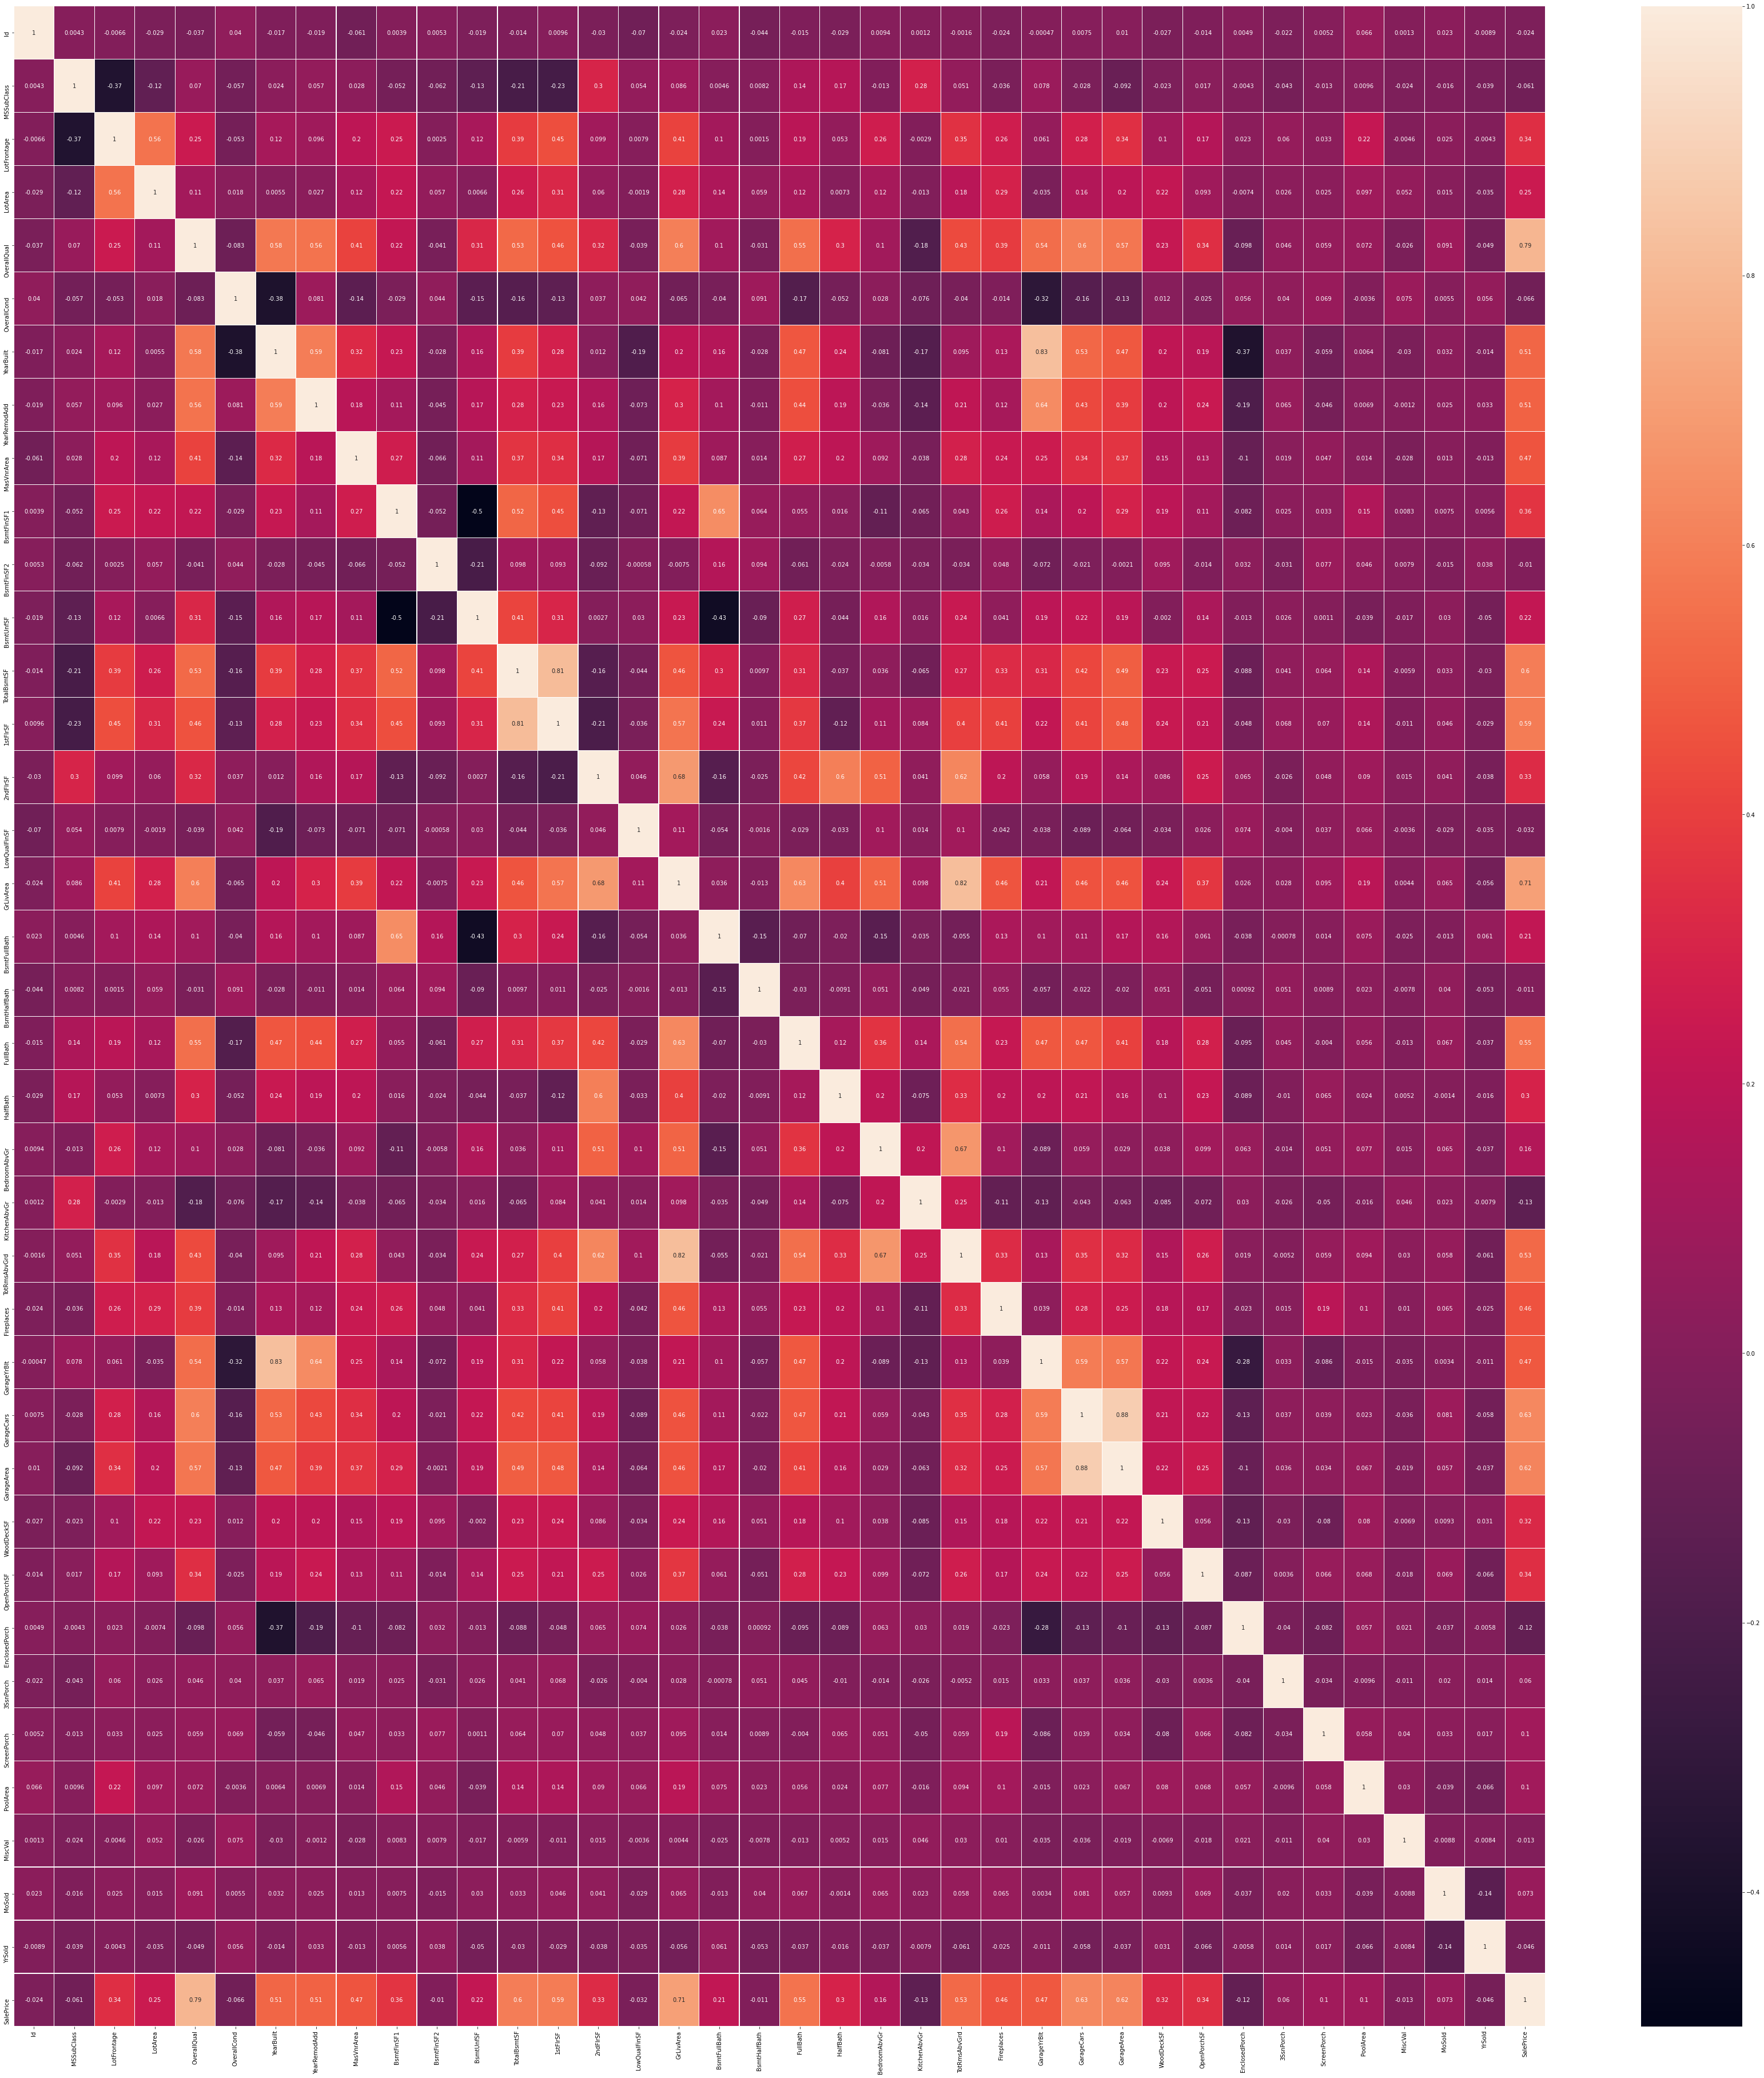

In [16]:
import seaborn as sns
plt.figure(figsize=(60,65))
sns.heatmap(hp_train.corr(),annot=True,linecolor='white',linewidth=.2)
plt.show()

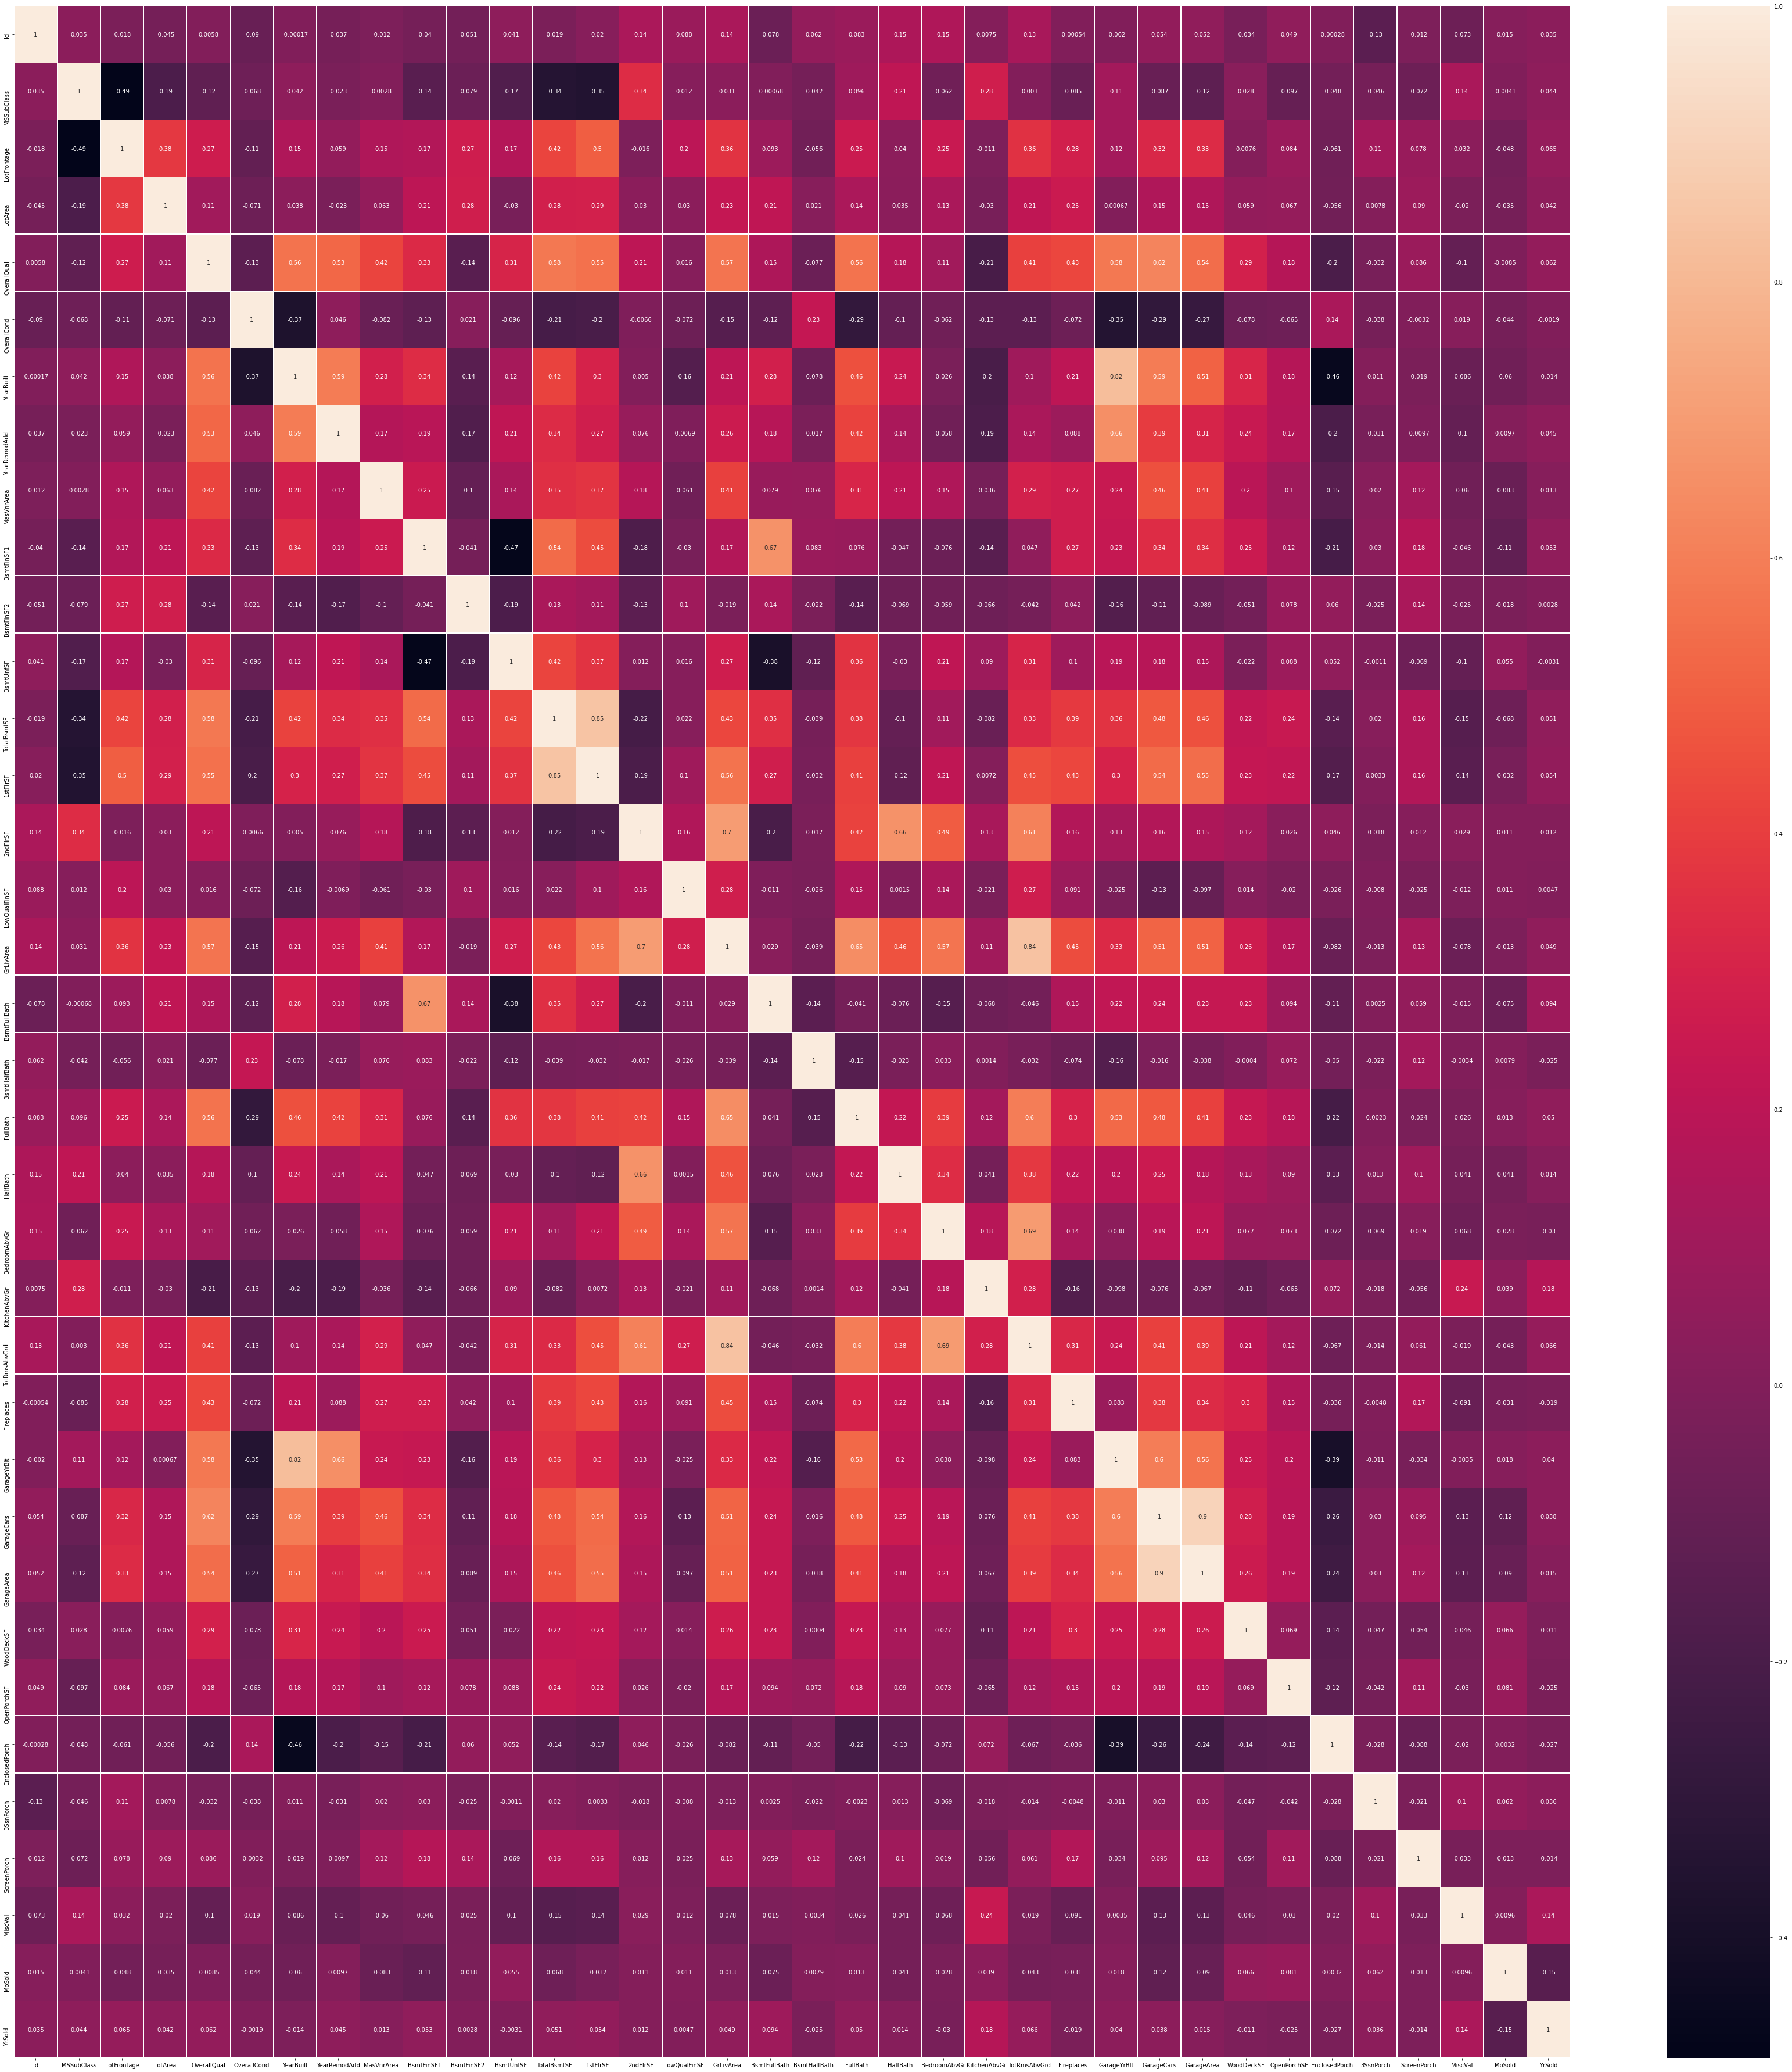

In [17]:
plt.figure(figsize=(60,65))
sns.heatmap(hp_test.corr(),annot=True,linecolor='white',linewidth=.2)
plt.show()

# Univariate Analysis:

min MSSubClass: 20
max MSSubClass: 190


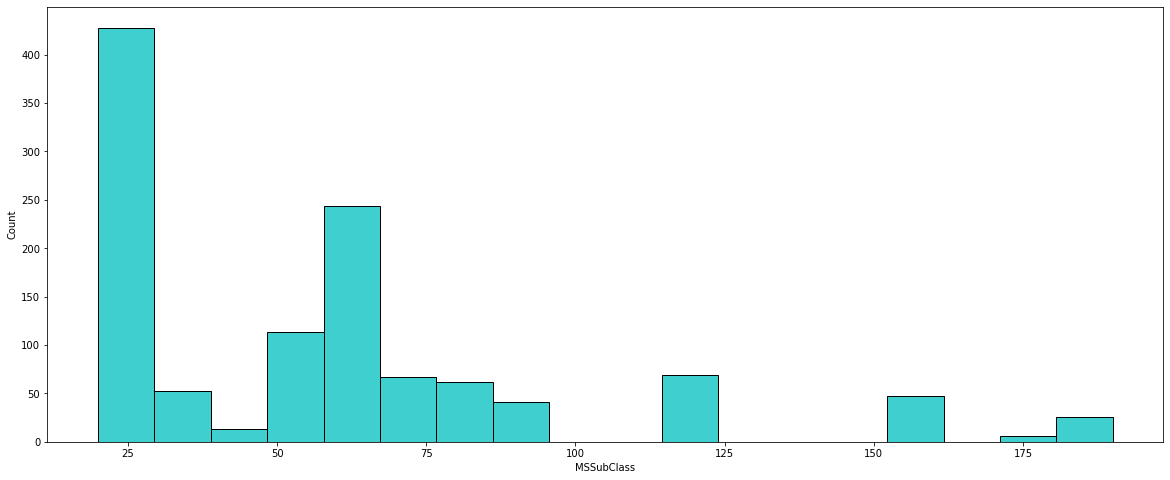

In [18]:
print('min MSSubClass:',hp_train['MSSubClass'].min())
print('max MSSubClass:',hp_train['MSSubClass'].max())
plt.figure(figsize=(20,8))
sns.histplot(hp_train['MSSubClass'],color='c')
plt.show()

min MSSubClass: 20
max MSSubClass: 190


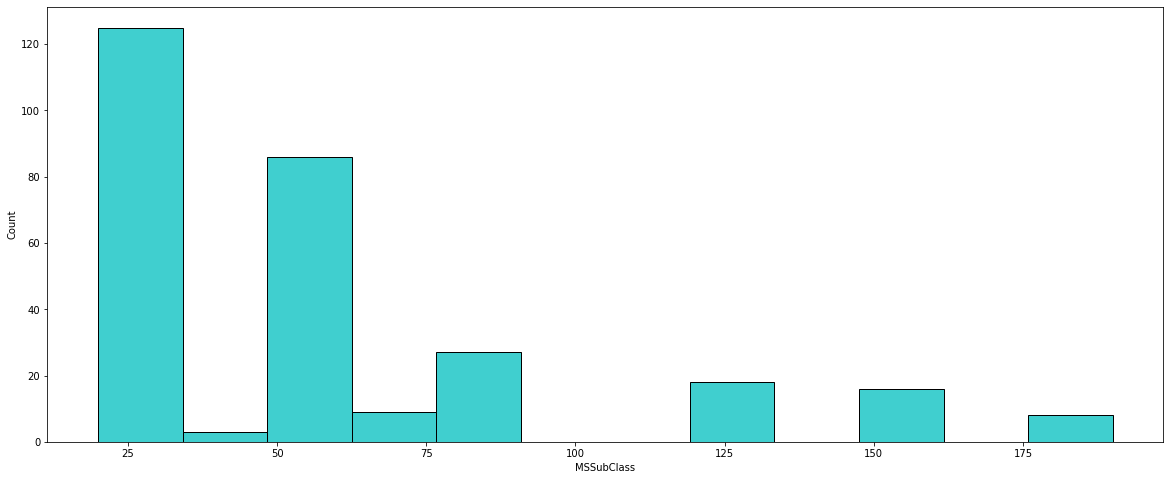

In [19]:
print('min MSSubClass:',hp_test['MSSubClass'].min())
print('max MSSubClass:',hp_test['MSSubClass'].max())
plt.figure(figsize=(20,8))
sns.histplot(hp_test['MSSubClass'],color='c')
plt.show()

min LotFrontage: 21.0
max LotFrontage: 313.0


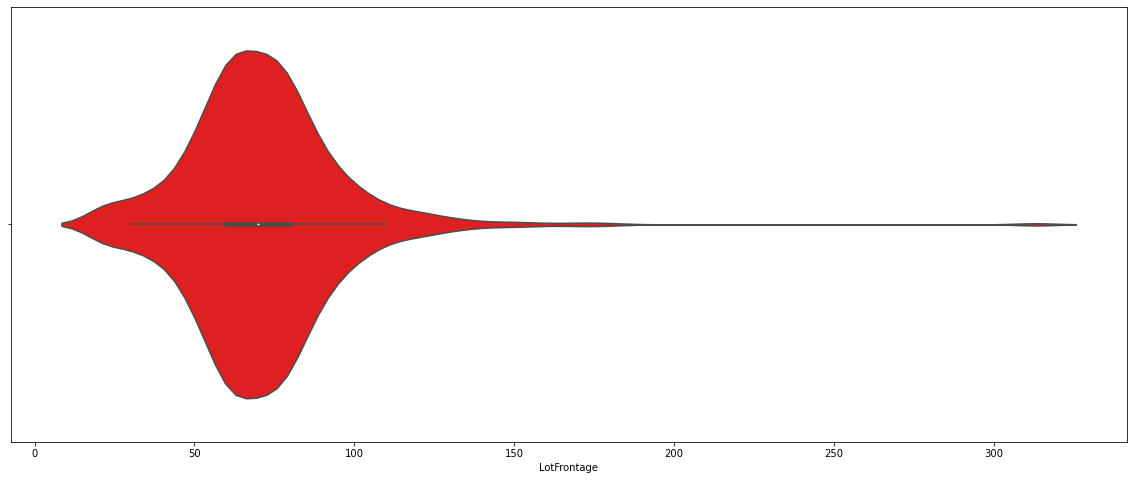

In [20]:
print('min LotFrontage:',hp_train['LotFrontage'].min())
print('max LotFrontage:',hp_train['LotFrontage'].max())
plt.figure(figsize=(20,8))
sns.violinplot(hp_train['LotFrontage'],color='r')
plt.show()

min LotFrontage: 21.0
max LotFrontage: 150.0


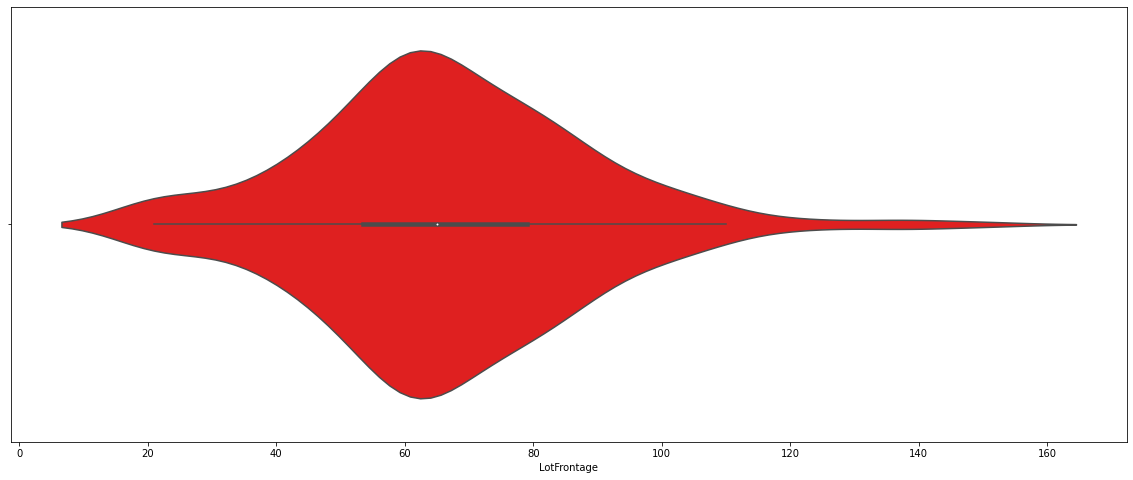

In [21]:
print('min LotFrontage:',hp_test['LotFrontage'].min())
print('max LotFrontage:',hp_test['LotFrontage'].max())
plt.figure(figsize=(20,8))
sns.violinplot(hp_test['LotFrontage'],color='r')
plt.show()

min LotArea: 1300
max LotArea: 164660


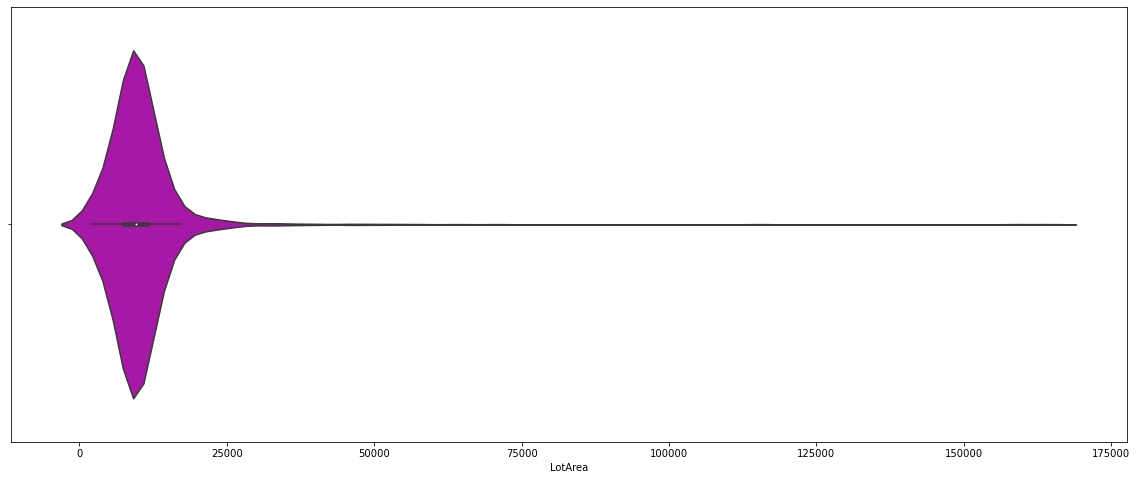

In [22]:
print('min LotArea:',hp_train['LotArea'].min())
print('max LotArea:',hp_train['LotArea'].max())
plt.figure(figsize=(20,8))
sns.violinplot(hp_train['LotArea'],color='m')
plt.show()

min LotArea: 1526
max LotArea: 215245


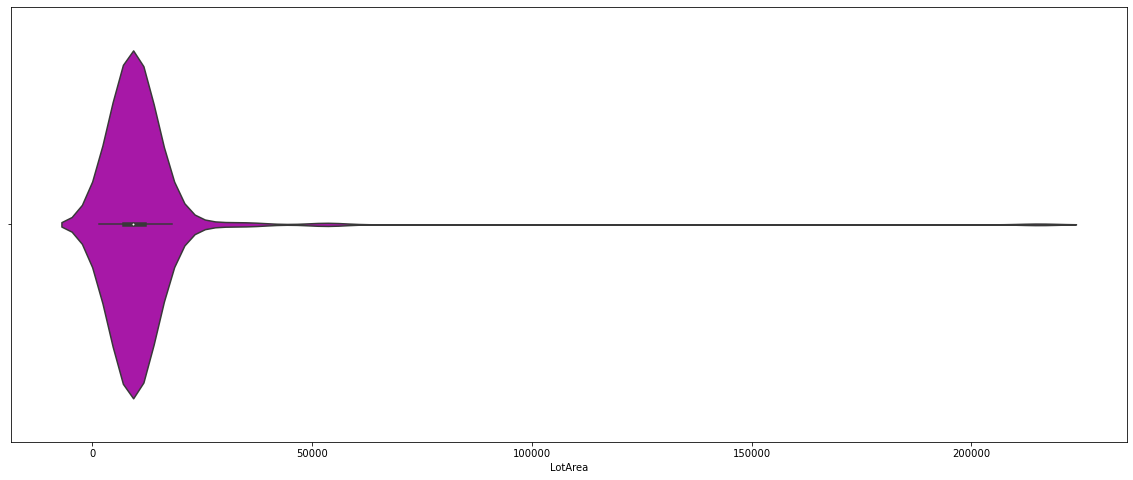

In [23]:
print('min LotArea:',hp_test['LotArea'].min())
print('max LotArea:',hp_test['LotArea'].max())
plt.figure(figsize=(20,8))
sns.violinplot(hp_test['LotArea'],color='m')
plt.show()

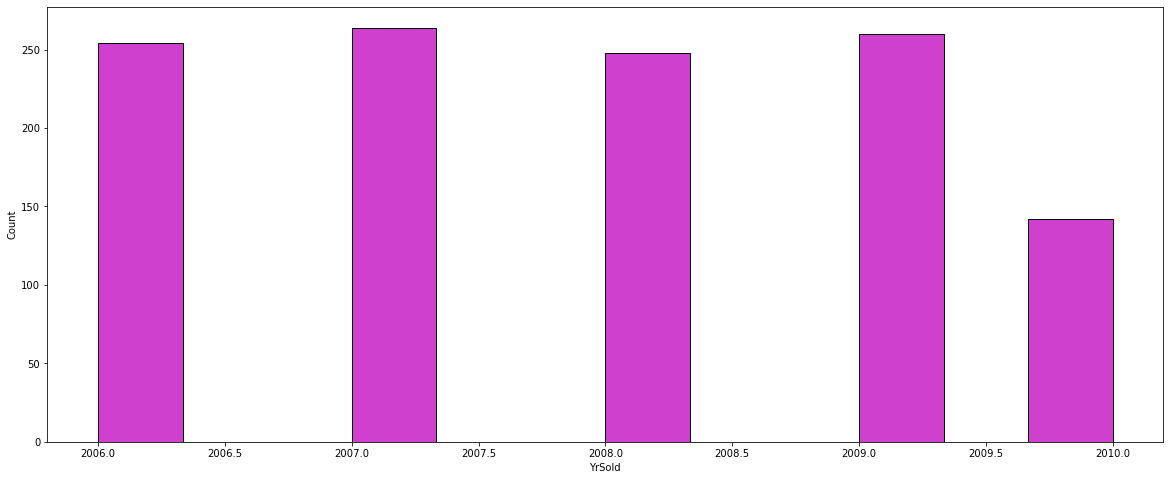

In [24]:
plt.figure(figsize=(20,8))
sns.histplot(hp_train['YrSold'],color='m')
plt.show()

min YrSold: 2006
max YrSold: 2010


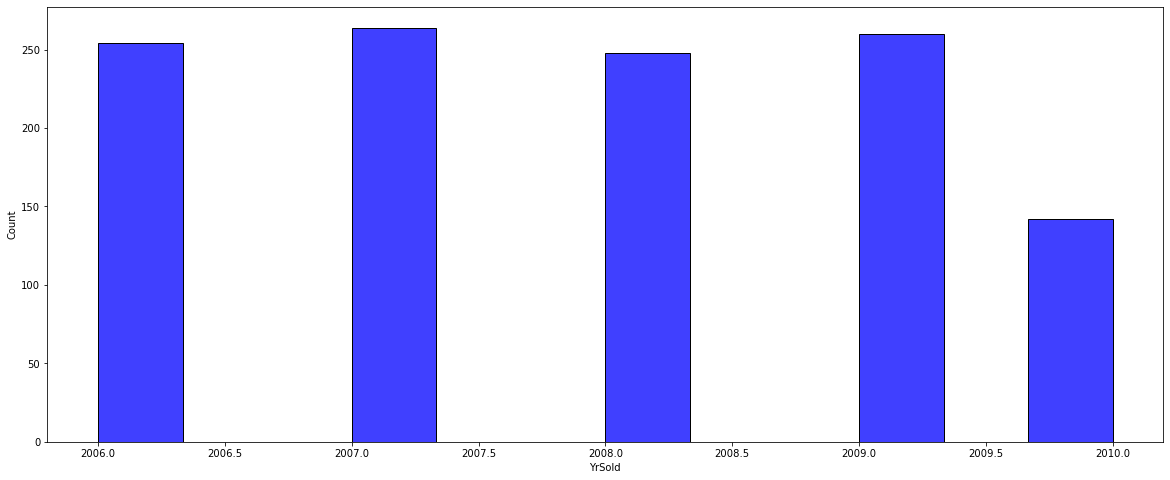

In [25]:
print('min YrSold:',hp_train['YrSold'].min())
print('max YrSold:',hp_train['YrSold'].max())
plt.figure(figsize=(20,8))
sns.histplot(hp_train['YrSold'],color='b')
plt.show()

min YrSold: 2006
max YrSold: 2010


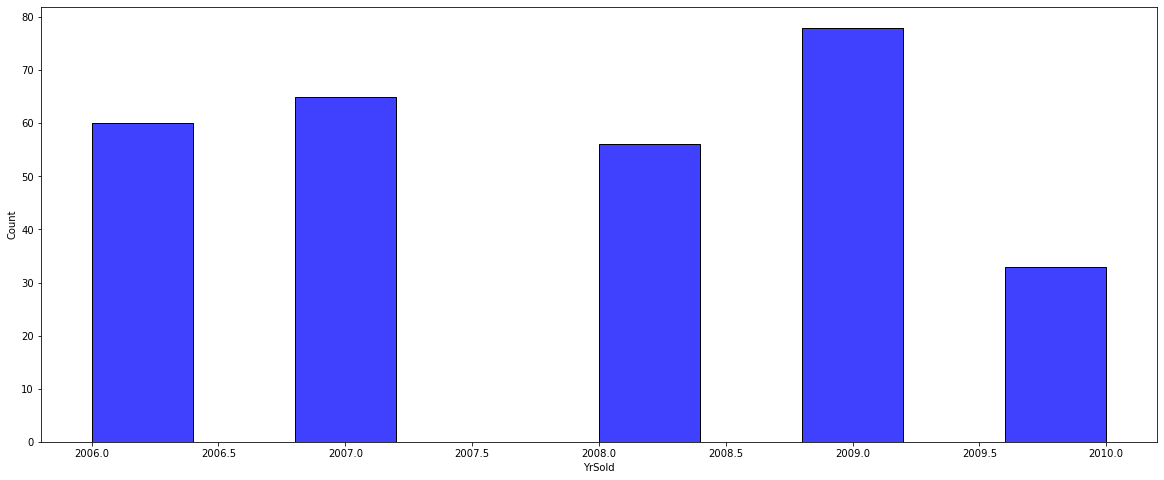

In [26]:
print('min YrSold:',hp_test['YrSold'].min())
print('max YrSold:',hp_test['YrSold'].max())
plt.figure(figsize=(20,8))
sns.histplot(hp_test['YrSold'],color='b')
plt.show()

min SalePrice: 34900
max SalePrice: 755000


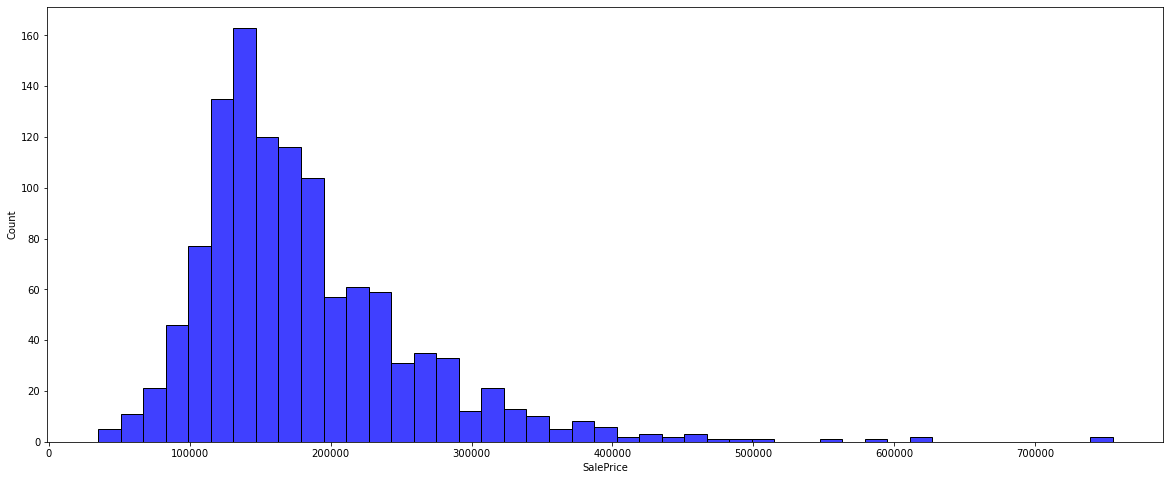

In [27]:
print('min SalePrice:',hp_train['SalePrice'].min())
print('max SalePrice:',hp_train['SalePrice'].max())
plt.figure(figsize=(20,8))
sns.histplot(hp_train['SalePrice'],color='b')
plt.show()

# Bivariate Analysis:

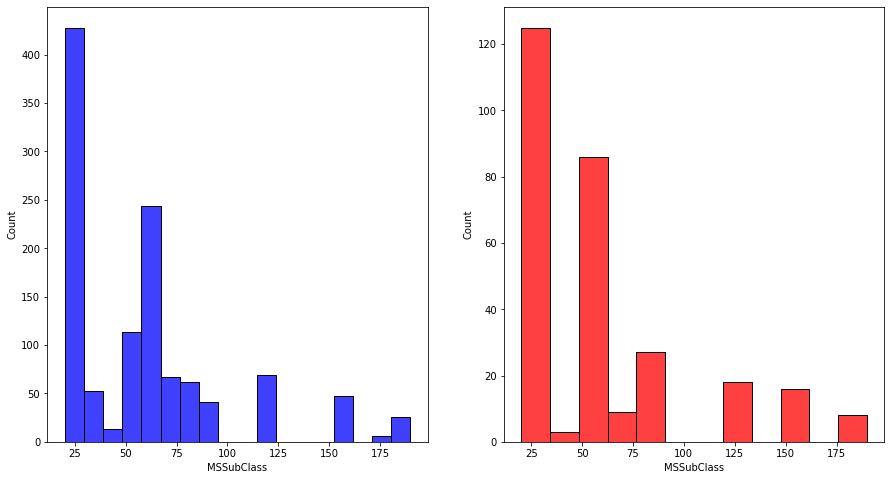

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(hp_train['MSSubClass'],color='blue')

plt.subplot(1,2,2)
sns.histplot(hp_test['MSSubClass'],color='red')
plt.show()

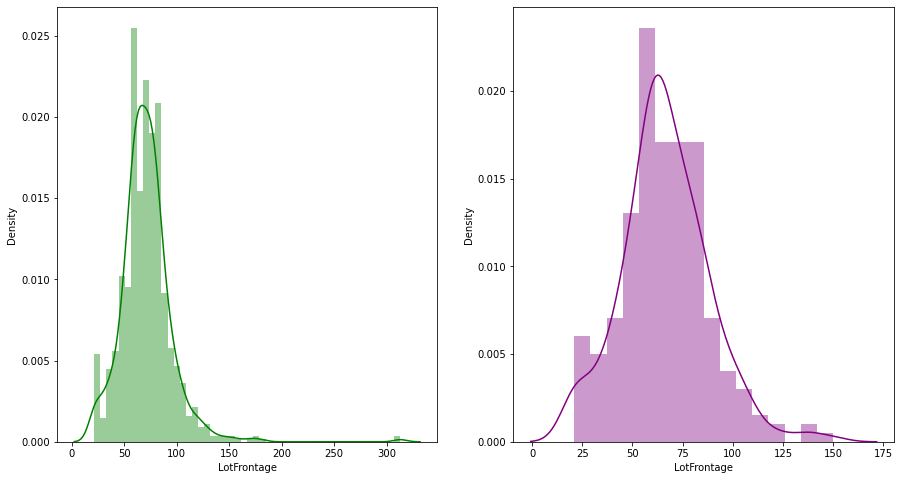

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(hp_train['LotFrontage'],color='green')

plt.subplot(1,2,2)
sns.distplot(hp_test['LotFrontage'],color='purple')
plt.show()

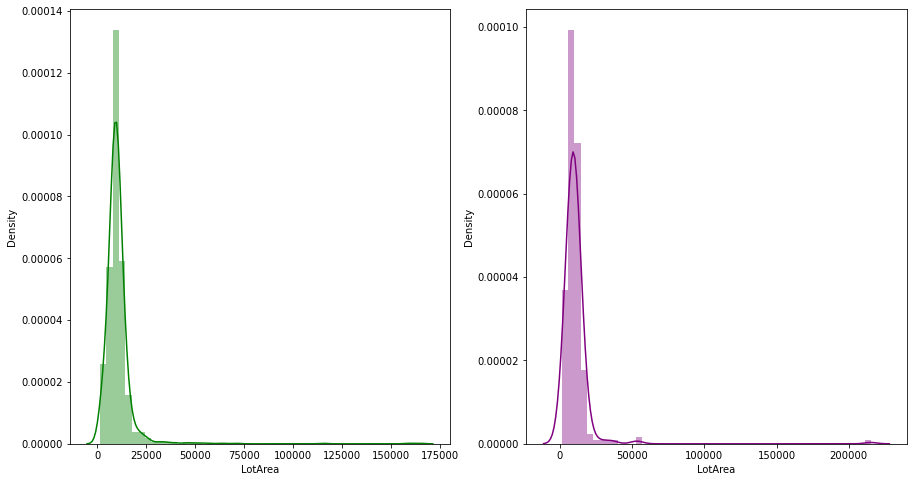

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(hp_train['LotArea'],color='green')

plt.subplot(1,2,2)
sns.distplot(hp_test['LotArea'],color='purple')
plt.show()

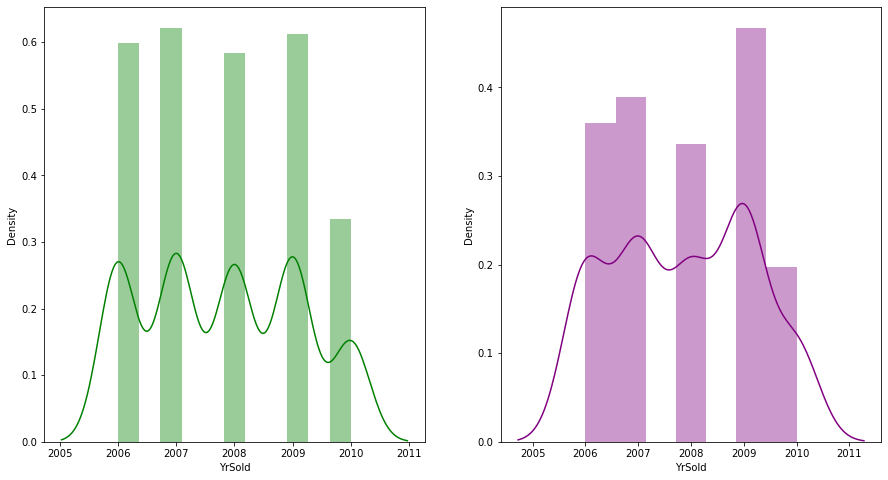

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(hp_train['YrSold'],color='green')

plt.subplot(1,2,2)
sns.distplot(hp_test['YrSold'],color='purple')
plt.show()

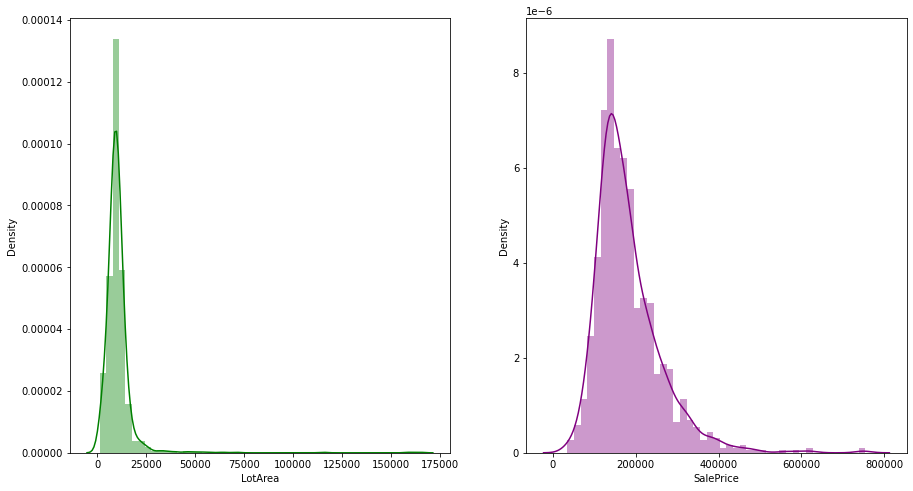

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(hp_train['LotArea'],color='green')

plt.subplot(1,2,2)
sns.distplot(hp_train['SalePrice'],color='purple')
plt.show()

# Multivariate Analysis:

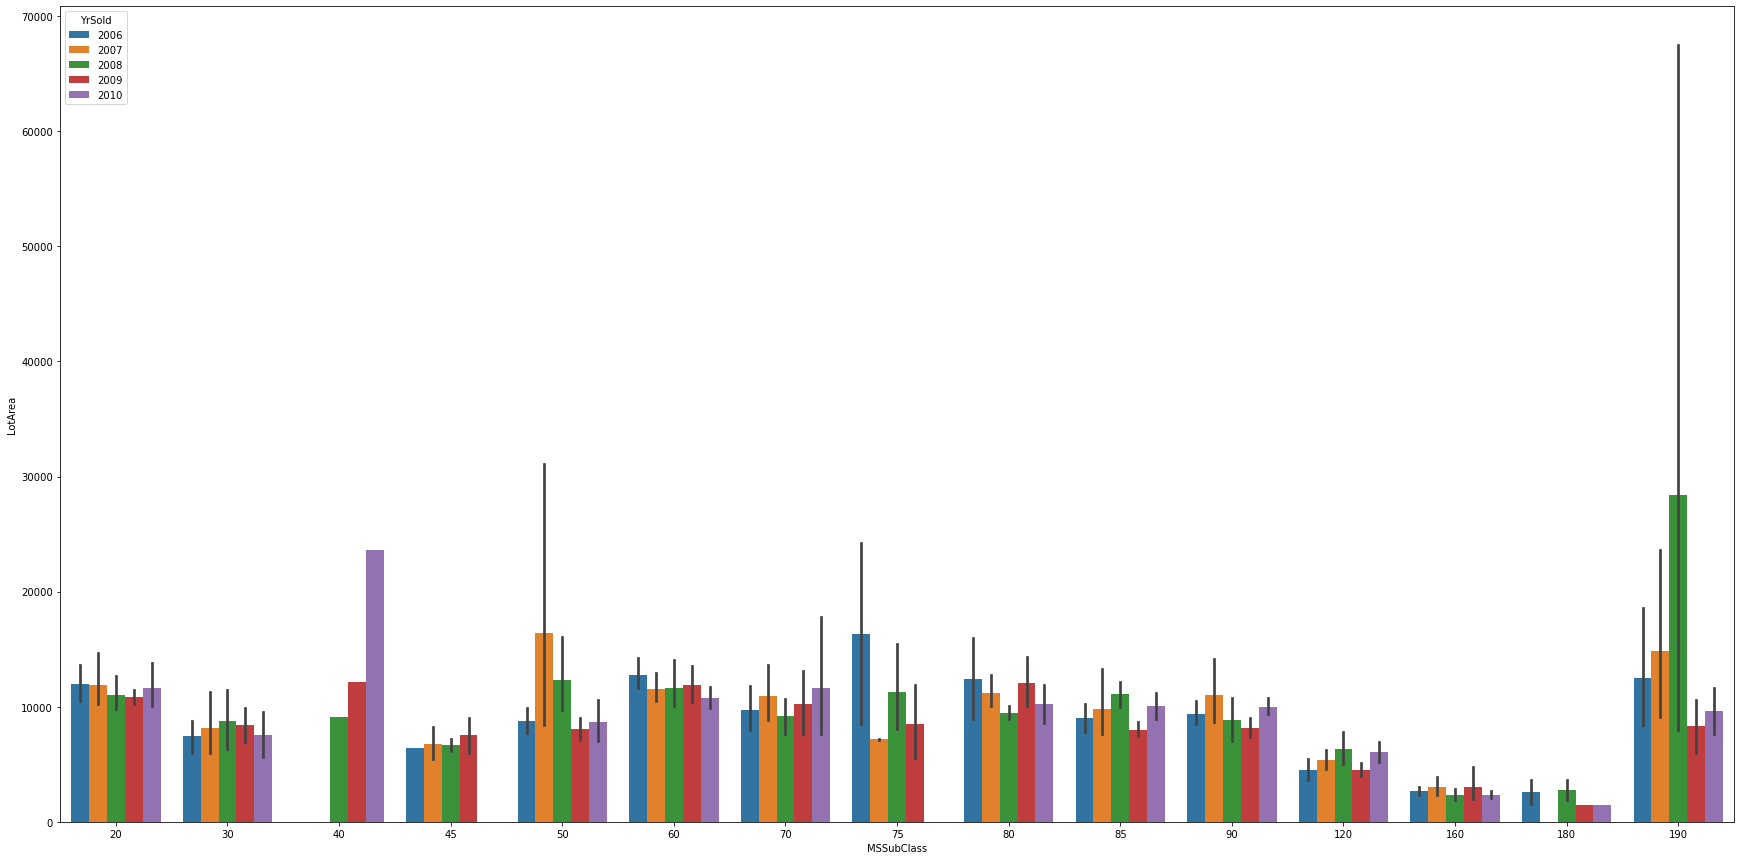

In [33]:
plt.figure(figsize=(30,15))
sns.barplot(x="MSSubClass" , y = "LotArea", hue='YrSold',data=hp_train)
plt.show()

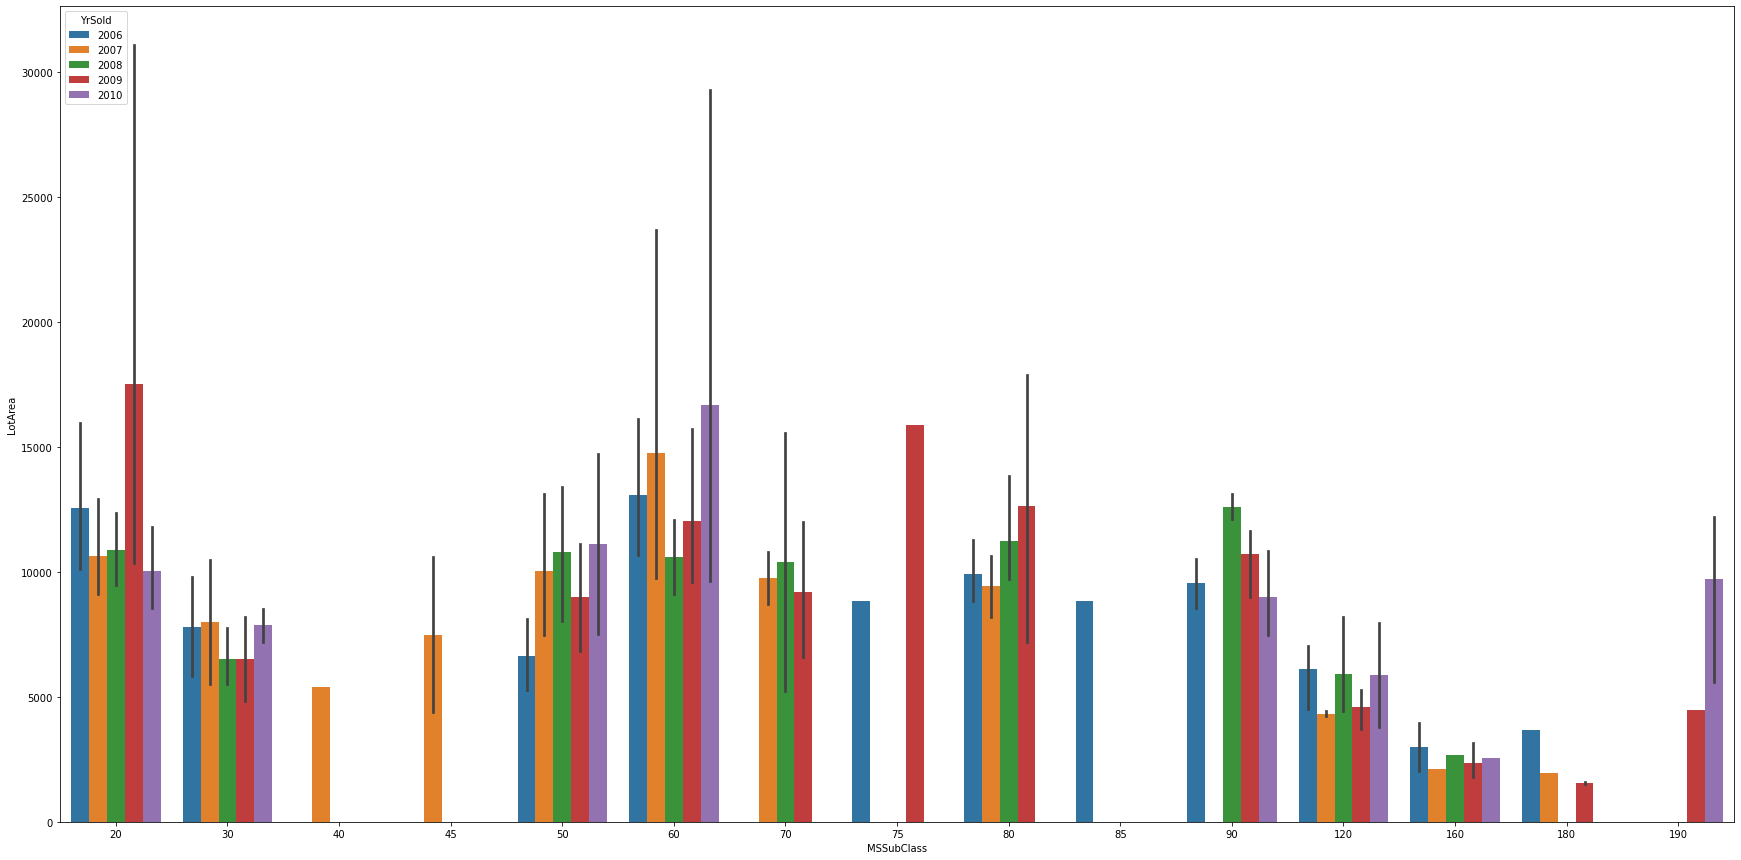

In [34]:
plt.figure(figsize=(30,15))
sns.barplot(x="MSSubClass" , y = "LotArea", hue='YrSold',data=hp_test)
plt.show()

# Making dataframe for ordinal data:

In [35]:
data=hp_train[['LotFrontage', 'LotArea','YearBuilt','GrLivArea', 'GarageYrBlt','MoSold', 'YrSold',
                                'SalePrice']].copy()

In [36]:
data1=hp_test[['LotFrontage', 'LotArea','YearBuilt','GrLivArea', 'GarageYrBlt','MoSold', 'YrSold',
                                ]].copy()

In [37]:
hp_train['LotFrontage']=hp_train['LotFrontage'].fillna(hp_train['LotFrontage'].mean())
hp_train['GarageYrBlt']=hp_train['GarageYrBlt'].fillna(hp_train['GarageYrBlt'].mean())
hp_train['MasVnrArea']=hp_train['MasVnrArea'].fillna(hp_train['MasVnrArea'].mean())
hp_train['GarageYrBlt']=hp_train['GarageYrBlt'].fillna(hp_train['GarageYrBlt'].mean())

In [38]:
#Dealing with null values present in the dataset.
hp_train['Alley']=hp_train['Alley'].fillna(hp_train['Alley'].mode()[0])
hp_train['BsmtQual']=hp_train['BsmtQual'].fillna(hp_train['BsmtQual'].mode()[0])
hp_train['BsmtCond']=hp_train['BsmtCond'].fillna(hp_train['BsmtCond'].mode()[0])
hp_train['BsmtExposure']=hp_train['BsmtExposure'].fillna(hp_train['BsmtExposure'].mode()[0])
hp_train['BsmtFinType1']=hp_train['BsmtFinType1'].fillna(hp_train['BsmtFinType1'].mode()[0])
hp_train['BsmtFinType2']=hp_train['BsmtFinType2'].fillna(hp_train['BsmtFinType2'].mode()[0])
hp_train['FireplaceQu']=hp_train['FireplaceQu'].fillna(hp_train['FireplaceQu'].mode()[0])
hp_train['GarageType']=hp_train['GarageType'].fillna(hp_train['GarageType'].mode()[0])
hp_train['GarageFinish']=hp_train['GarageFinish'].fillna(hp_train['GarageFinish'].mode()[0])
hp_train['MasVnrType']=hp_train['MasVnrType'].fillna(hp_train['MasVnrType'].mode()[0])
hp_train['GarageFinish']=hp_train['GarageFinish'].fillna(hp_train['GarageFinish'].mode()[0])
hp_train['GarageQual']=hp_train['GarageQual'].fillna(hp_train['GarageQual'].mode()[0])
hp_train['GarageCond']=hp_train['GarageCond'].fillna(hp_train['GarageCond'].mode()[0])
hp_train['PoolQC']=hp_train['PoolQC'].fillna(hp_train['PoolQC'].mode()[0])
hp_train['Fence']=hp_train['Fence'].fillna(hp_train['Fence'].mode()[0])
hp_train['MiscFeature']=hp_train['MiscFeature'].fillna(hp_train['MiscFeature'].mode()[0])

In [39]:
hp_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

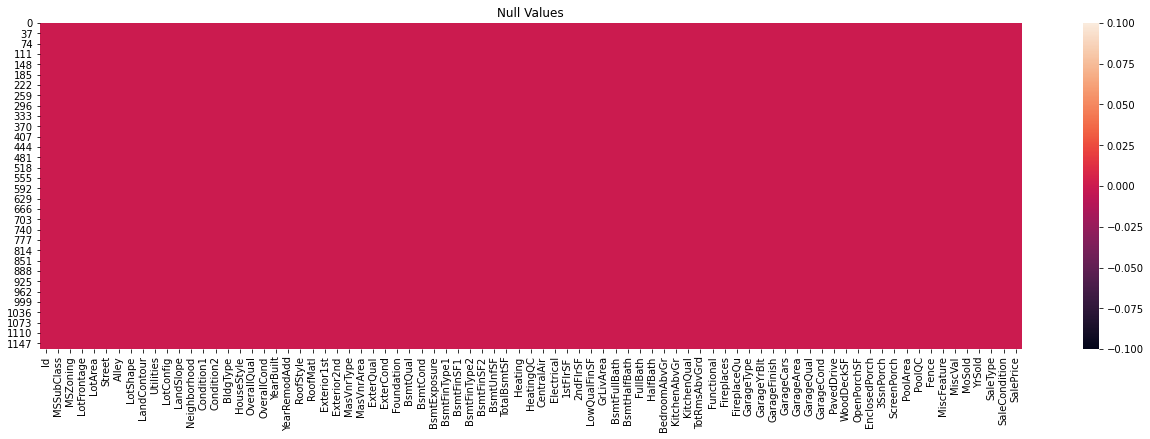

In [40]:
#Heatmap for null values
plt.figure(figsize=[22,6])
sns.heatmap(hp_train.isnull())
plt.title('Null Values')
plt.show()

# Encoder:

In [41]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [42]:
for i in hp_train.columns:
    if hp_train[i].dtypes=="object":
        hp_train[i]=enc.fit_transform(hp_train[i].values.reshape(-1,1))

In [43]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2009,8.0,4.0,215000


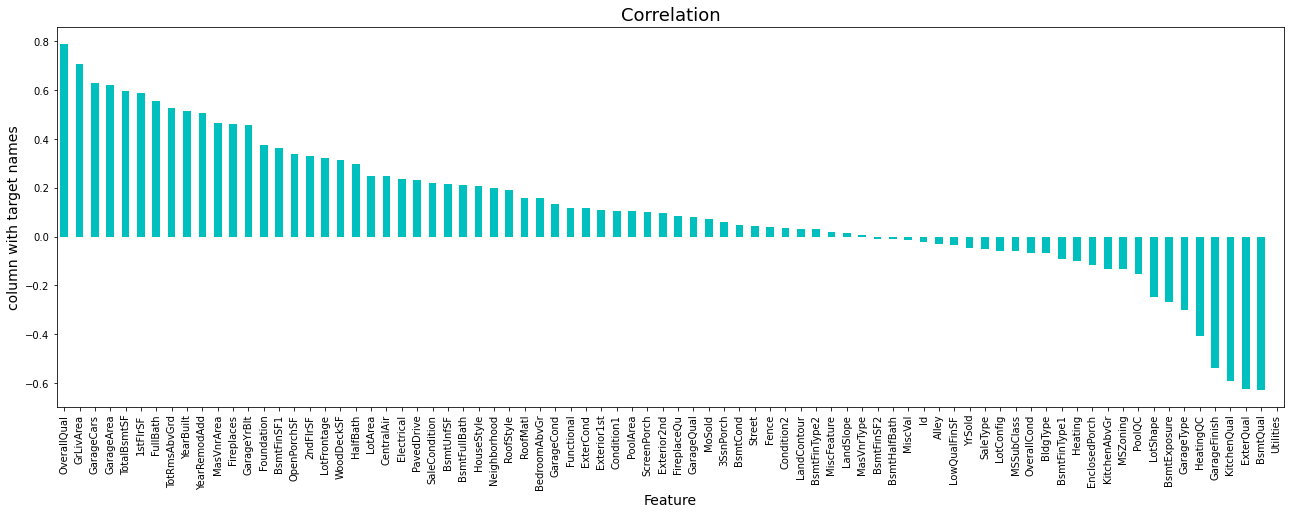

In [44]:
plt.figure(figsize=(22,7))
hp_train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [45]:
collist=hp_train.columns.values
ncol=12
nrow=10

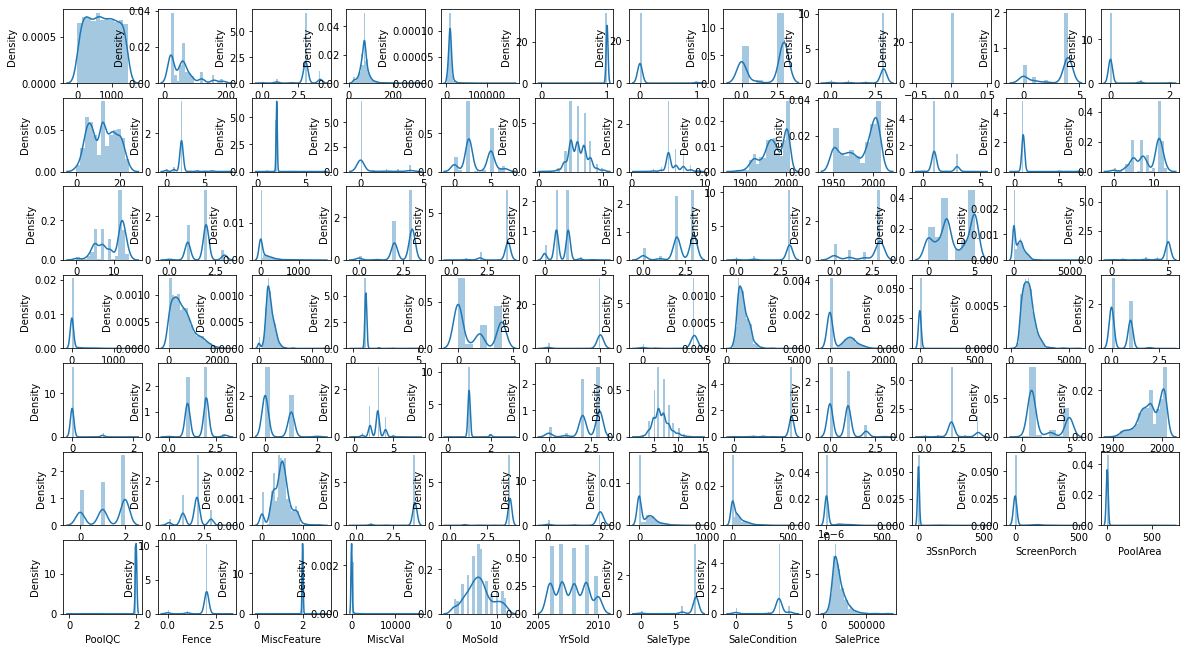

In [46]:
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(hp_train[collist[i]])

# Outlier Detection:

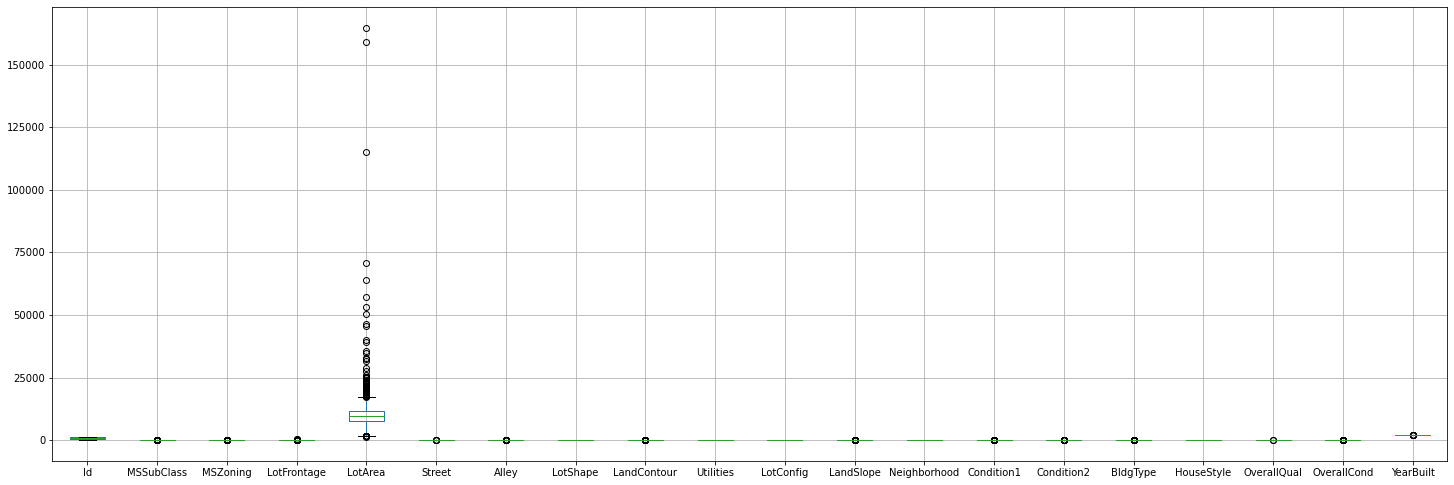

In [47]:
hp_train.iloc[:,0:20].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

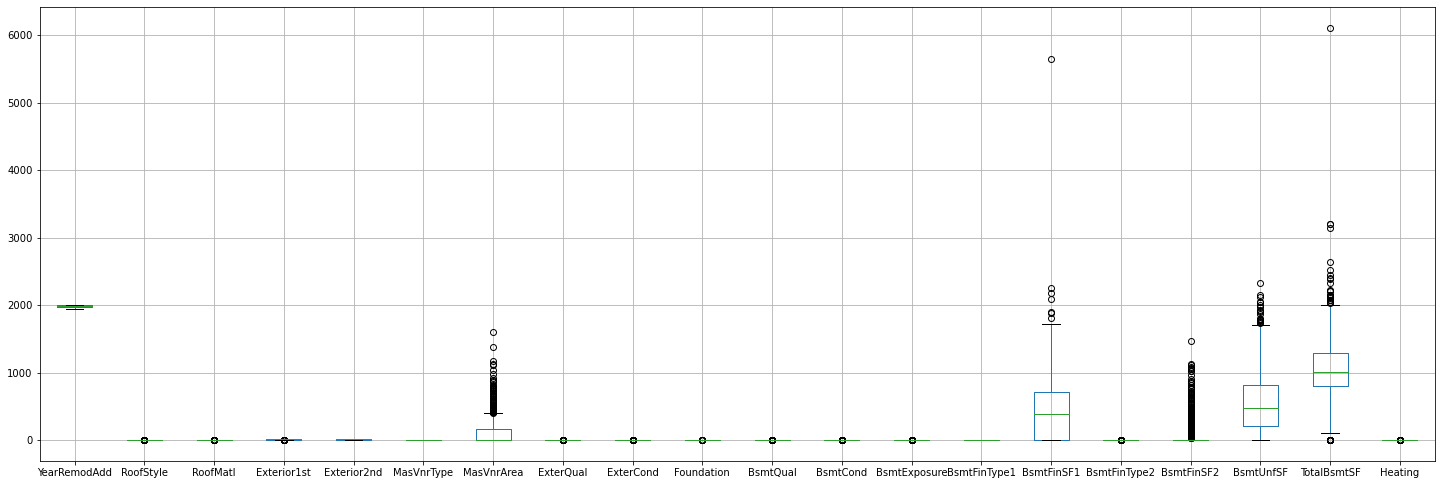

In [48]:
hp_train.iloc[:,20:40].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

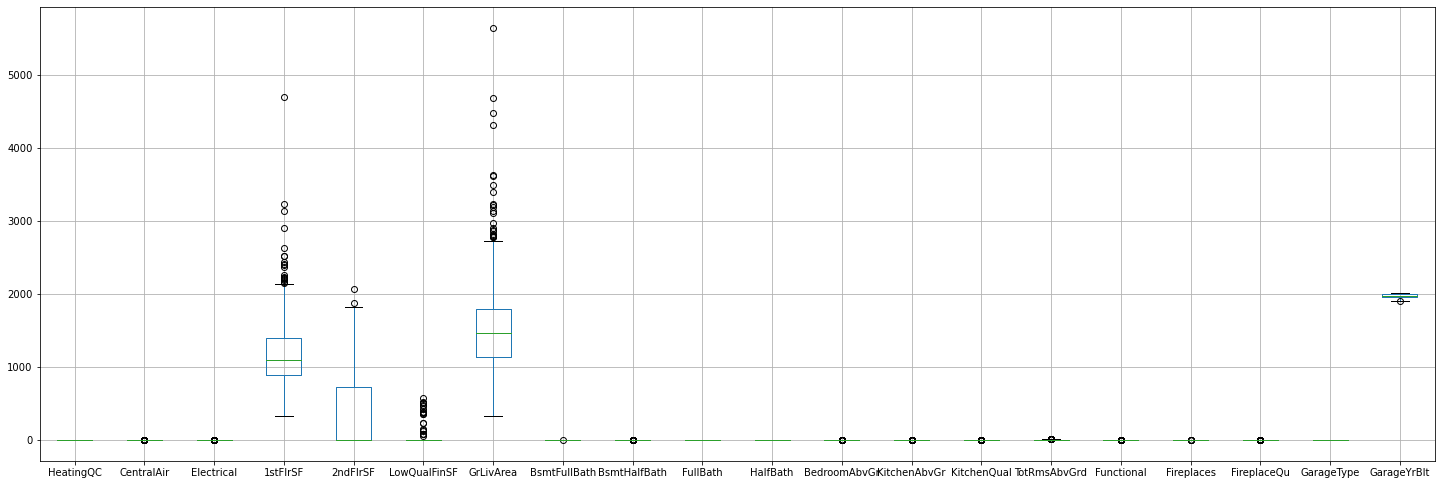

In [49]:
hp_train.iloc[:,40:60].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()


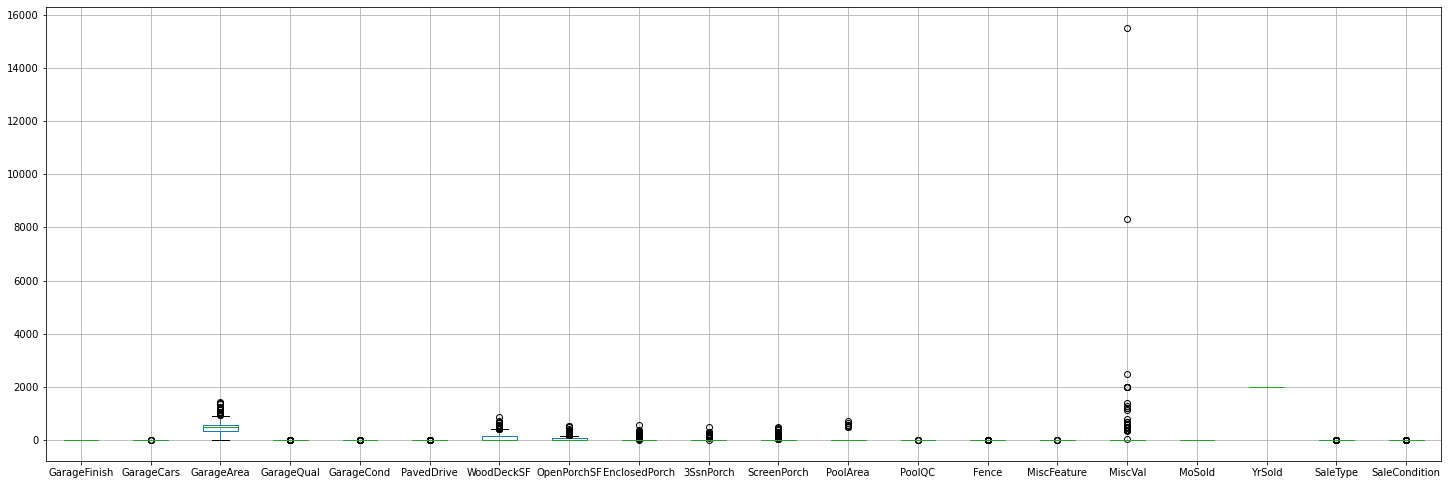

In [50]:
hp_train.iloc[:,60:80].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()


# Skewness:

In [51]:
hp_train.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 81, dtype: float64

In [52]:
hp_new= pd.concat([hp_train,hp_test],ignore_index=True)

In [53]:
x=hp_train.drop('SalePrice',axis=1)
y= hp_train['SalePrice']

In [54]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,2,2007,8.0,4.0
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,0.0,...,224,0,2.0,2.0,2.0,0,10,2007,8.0,4.0
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,6,2007,8.0,4.0
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,1,2010,0.0,4.0
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,6,2009,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,70.98847,9819,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,2,2010,8.0,4.0
1164,554,20,3.0,67.00000,8777,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,5,2009,8.0,4.0
1165,196,160,3.0,24.00000,2280,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,7,2009,8.0,4.0
1166,31,70,0.0,50.00000,8500,1.0,1.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,7,2008,8.0,4.0


#Removing skewness using power transformation.

In [55]:
from sklearn.preprocessing import power_transform
hp_trainn=power_transform(x)
hp_trainn=pd.DataFrame(hp_trainn,columns=x.columns)

In [56]:
hp_trainn.skew()

Id              -0.268486
MSSubClass       0.064007
MSZoning         0.233113
LotFrontage      0.161368
LotArea          0.032509
                   ...   
MiscVal          4.991071
MoSold          -0.035838
YrSold           0.112893
SaleType        -2.067563
SaleCondition   -0.353292
Length: 80, dtype: float64

In [57]:
x=hp_trainn
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.544968,1.370435,-0.162456,0.093658,-1.213954,0.058621,-0.178331,-1.366794,0.341434,0.0,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-1.719437,-0.604806,0.409069,0.029735
1,0.461941,-1.167999,-0.162456,1.117135,1.100521,0.058621,-0.178331,-1.366794,0.341434,0.0,...,3.360787,-0.077648,0.058621,0.177447,0.010754,-0.193133,1.320612,-0.604806,0.409069,0.029735
2,0.254221,0.490047,-0.162456,0.998803,0.158048,0.058621,-0.178331,-1.366794,0.341434,0.0,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-0.076750,-0.604806,0.409069,0.029735
3,-1.610857,-1.167999,-0.162456,1.495566,0.496002,0.058621,-0.178331,-1.366794,0.341434,0.0,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-2.209015,1.649761,-2.769993,0.029735
4,-0.635571,-1.167999,-0.162456,0.093658,1.196626,0.058621,-0.178331,-1.366794,0.341434,0.0,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-0.076750,0.899576,0.409069,0.029735


In [58]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)

In [60]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [61]:
pca=PCA()
pca.fit_transform(scaled_value)

array([[-6.53904217e-01,  2.52978010e-01, -1.81045086e+00, ...,
        -7.52286941e-02, -5.61435294e-03, -1.30000877e-16],
       [ 2.45479855e+00,  3.62724764e+00,  3.72659882e+00, ...,
         5.85270540e-02,  1.16885069e-01,  6.14032459e-16],
       [ 2.95970082e+00,  3.11318654e-01,  7.98306206e-01, ...,
        -4.71034835e-02,  1.13789667e-02, -4.06602284e-16],
       ...,
       [-1.20032591e+00, -9.81727962e-01, -1.29111006e+00, ...,
        -2.12748135e-01, -5.88751290e-03,  1.84963202e-16],
       [-5.96308772e+00, -4.00078129e+00,  1.07462549e+00, ...,
         2.26160252e-01,  8.92178537e-03, -5.86137572e-17],
       [ 2.81100026e+00, -1.03343557e+00, -9.84258136e-01, ...,
        -8.32170499e-02, -1.94989404e-03,  2.46911426e-17]])

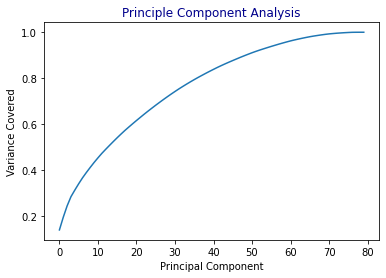

In [62]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('Principle Component Analysis',color='darkblue')
plt.show()

# Model Creation:

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [64]:
x_train, y_test ,x_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [65]:
def maxr2_score(clf,x,y):   
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    
    
    return final_r
        
        

max r2 score corresponding to 48 is 84.79711268954865
cross validation score 75.13414592715894
Standard Deviation 6.431836873393207
Training accuracy 83.66271539512931
Test Accuracy 80.95885473057409
MAE 23265.39811879436
MSE 1114228491.7592509
RMSE 33380.06129052568




48

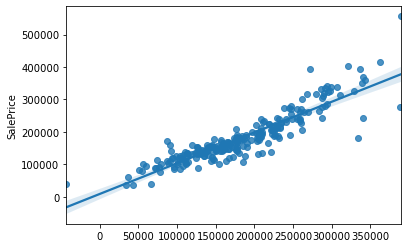

In [66]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 48 is 84.79650464678723
cross validation score 75.14384766988663
Standard Deviation 6.428632605989433
Training accuracy 83.66289783753898
Test Accuracy 80.95615498910395
MAE 23267.74411610007
MSE 1114386472.218086
RMSE 33382.4275962382




48

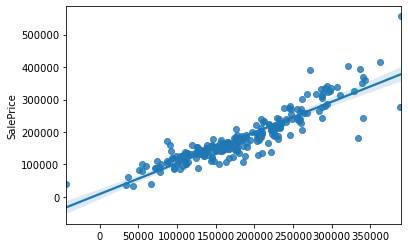

In [67]:
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 48 is 84.79979537494033
cross validation score 75.18684979762737
Standard Deviation 6.392290872127209
Training accuracy 83.66281086949726
Test Accuracy 80.98231121934262
MAE 23252.78665486424
MSE 1112855891.123485
RMSE 33359.49476720961




48

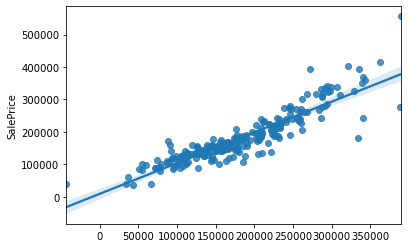

In [68]:
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 89 is 83.22004265355102
cross validation score 69.1362492624078
Standard Deviation 5.364080329698371
Training accuracy 100.0
Test Accuracy 72.47628302496969
MAE 26617.978632478633
MSE 1610602157.525641
RMSE 40132.3081509853




89

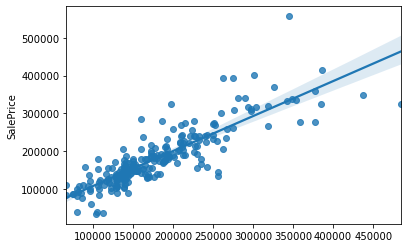

In [69]:
dt2=DecisionTreeRegressor()
maxr2_score(dt2,x,y)

max r2 score corresponding to 62 is 82.39942355684246
cross validation score 73.79446075355828
Standard Deviation 2.1371611771350523
Training accuracy 82.06740403139165
Test Accuracy 80.33865982596558
MAE 22408.275213675217
MSE 1150520365.1408546
RMSE 33919.321413330996




62

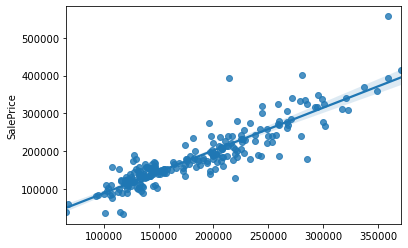

In [70]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 72 is 90.60749906915147
cross validation score 83.80935867186021
Standard Deviation 4.480527317895593
Training accuracy 97.8160830764491
Test Accuracy 87.95123025316407
MAE 18083.485085470085
MSE 705056463.3907789
RMSE 26552.89934057633




72

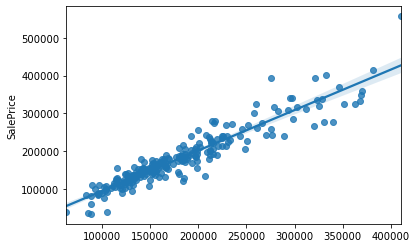

In [71]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 89 is 65.72381732192008
cross validation score 41.0063135088585
Standard Deviation 13.098177494749526
Training accuracy 56.843821064365244
Test Accuracy 37.76505573358697
MAE 47067.015081404046
MSE 3641795023.539419
RMSE 60347.28679517762




89

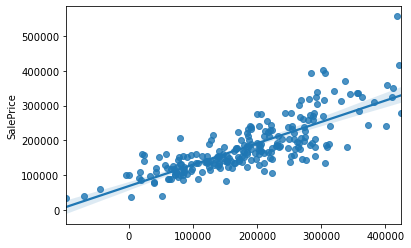

In [72]:
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

max r2 score corresponding to 89 is 92.48211554039666
cross validation score 86.48318727737129
Standard Deviation 5.349193357739448
Training accuracy 97.33205808107573
Test Accuracy 90.09262322432049
MAE 16455.330510342224
MSE 579748818.9841872
RMSE 24077.973730864214




89

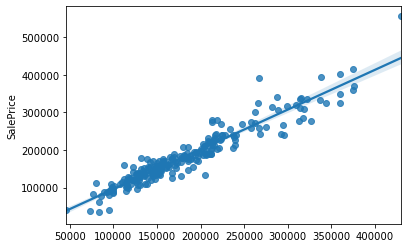

In [73]:
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'n_estimators': 200}

 Mean Absolute Error (MAE) : 1828825.5213675213
Mean Squared Error (MSE) : 85229841696.87996
Root Mean Squared Error : 2919415.0389569476
R_2 score: 75.07363810708098


<AxesSubplot:ylabel='SalePrice'>

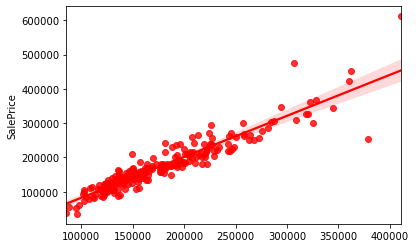

In [79]:
forest=RandomForestRegressor(bootstrap=True,max_depth=50,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

In [80]:
import joblib
joblib.dump(rf,'house_price.pkl')

['house_price.pkl']

In [81]:
loaded_model=joblib.load('house_price.pkl')
prediction=loaded_model.predict(x_test)

In [82]:
prediction

array([223192.12, 133535.  , 176354.87, 167206.15, 149459.45, 143076.14,
       100492.5 , 330489.57, 211032.4 , 191414.5 , 210593.75, 112596.  ,
       151004.48, 112333.5 ,  92879.5 , 182533.91, 118074.33, 175690.3 ,
       267985.42, 267739.02, 214935.32, 116172.41, 202191.5 , 199002.14,
       200298.44, 164486.22,  69302.87, 121549.5 , 220138.7 , 200028.65,
       166128.  , 148046.  , 119031.66, 186627.38, 213018.  , 138317.  ,
       281068.79, 251267.88,  52064.26, 128170.25, 169472.22, 193169.3 ,
        96741.  , 136976.5 , 200065.21, 193394.18, 128801.  , 188440.35,
       156282.1 , 228868.77, 187352.5 , 196260.5 , 165519.54, 150443.24,
       144279.9 ,  90962.93,  63826.  , 140191.  , 397000.54, 217990.66,
       124714.43, 138010.16, 159480.31, 116808.08,  72077.49, 106590.3 ,
       153375.35, 166221.5 , 210146.65, 126710.58, 104042.94, 132965.58,
       123346.  , 100727.73, 102433.52, 179089.69, 128538.74, 136203.  ,
       140266.5 , 243032.6 , 310683.13, 107686.49, 